In [1]:
import numpy as np
import graph_data as gd
import pprint
import pycountry_convert as country
import matplotlib.pyplot as plt

onehotencodedprops = {'node_hq_country', 'node_hq_continent', 'node_business_type', 'node_rir', 'link_relationship'}
nodes, links, node_properties, link_properties = gd.load_graph()
gd.initialize_lists(nodes, node_properties, links, link_properties)
nodes, links, node_properties, link_properties = gd.load_graph()
output_dict = gd.build_dict(nodes, links, node_properties, link_properties)
print(gd.continents)


mean = {}
std = {}
median = {}
node0 = output_dict['node'][0]
link0 = output_dict['link'][0]

for prop in node0.keys():
    if prop not in gd.not_int_props:
        new_entry = {prop : 0} 
        mean.update(new_entry)
        std.update(new_entry)
        median.update(new_entry)
        mean[prop] = np.mean([c[prop] for c in output_dict['node']])
        std[prop] = np.std([c[prop] for c in output_dict['node']])
        median[prop] = np.median([c[prop] for c in output_dict['node']])

for prop in link0.keys():
    if prop not in gd.not_int_props:
        new_entry = {prop : 0} 
        mean.update(new_entry)
        std.update(new_entry)
        median.update(new_entry)
        mean[prop] = np.mean([c[prop] for c in output_dict['link']])
        std[prop] = np.std([c[prop] for c in output_dict['link']])
        median[prop] = np.median([c[prop] for c in output_dict['link']])

print('Mean')
pprint.pprint(mean)
print('\n')
print('Standard Deviation')
pprint.pprint(std)
print('\n')
print('Median')
pprint.pprint(median)

# TODO
onehot = {}

for prop in node0.keys():
    if prop in onehotencodedprops:
        new_entry = {prop : 0} 
        onehot[prop] = np.array([c[prop] for c in output_dict['node']])
        onehot[prop] = list(onehot[prop])

for prop in link0.keys():
    if prop in onehotencodedprops:
        new_entry = {prop : 0} 
        onehot[prop] = np.array([c[prop] for c in output_dict['link']])
        onehot[prop] = list(onehot[prop])

for entry in onehot.items():
    appearances = {}
    for item in entry[1]:
        if entry[0] == 'node_hq_country':
            if gd.countries[item] != 'NOT_AVAILABLE':
                appearances[country.country_alpha2_to_country_name(gd.countries[item])] = entry[1].count(item)
            else:
                appearances[gd.countries[item]] = entry[1].count(item)
        if entry[0] == 'node_hq_continent':
            appearances[gd.continents[item]] = entry[1].count(item)
        if entry[0] == 'node_business_type':
            appearances[gd.business[item]] = entry[1].count(item)
        if entry[0] == 'node_rir':
            appearances[gd.rirs[item]] = entry[1].count(item)
        if entry[0] == 'link_relationship':
            appearances[gd.relationships[item]] = entry[1].count(item)

    new_entry = {entry[0]:appearances}
    onehot.update(new_entry)


['EU', '', 'AF', 'SA', 'AS', 'OC', 'NA']
Mean
{'link_advertised_pfxs_count': 413.79781838086956,
 'link_betweenness_d': 3714.899606672876,
 'link_betweenness_ud': 46875.5514128446,
 'link_transit_degree_ratio': 64.67833140771758,
 'link_vp_visibility': 32.94084642584393,
 'node_avg_neighbor_degree': 973.4127647640162,
 'node_betweenness_d': 8961.91590320254,
 'node_betweenness_ud': 104374.47291594317,
 'node_closeness_d': 0.12399193991615456,
 'node_closeness_ud': 0.2690434180001007,
 'node_eigenvector_ud': 0.0008506148748851631,
 'node_eigenvector_vmap': 0.001456408073790043,
 'node_harmonic_closeness_d': 0.006943410927620172,
 'node_harmonic_closeness_ud': 0.2780048294872532,
 'node_in_degree': 3.0253078340767647,
 'node_ip_space_originating': 43985.897232832074,
 'node_local_clustering_d': 0.0018028545326118563,
 'node_local_clustering_ud': 0.30508496558443926,
 'node_node_degree': 6.0506156681535295,
 'node_out_degree': 3.0253078340767647,
 'node_pagerank_d': 1.3355057560298096e-05

In [2]:
list_dicts = []
for entry in onehot.items():
    list_dicts.append(entry[1])

list_countries = list_dicts[0]
list_continents = list_dicts[1]
list_business = list_dicts[2]
list_rirs = list_dicts[3]
list_relationships = list_dicts[4]

pprint.pprint(list_dicts)

[{'Afghanistan': 53,
  'Albania': 89,
  'Algeria': 8,
  'American Samoa': 2,
  'Andorra': 1,
  'Angola': 54,
  'Anguilla': 3,
  'Antigua and Barbuda': 10,
  'Argentina': 1010,
  'Armenia': 98,
  'Aruba': 3,
  'Australia': 1652,
  'Austria': 584,
  'Azerbaijan': 61,
  'Bahamas': 8,
  'Bahrain': 20,
  'Bangladesh': 1238,
  'Barbados': 6,
  'Belarus': 106,
  'Belgium': 372,
  'Belize': 29,
  'Benin': 14,
  'Bermuda': 15,
  'Bhutan': 17,
  'Bolivia, Plurinational State of': 44,
  'Bonaire, Sint Eustatius and Saba': 5,
  'Bosnia and Herzegovina': 41,
  'Botswana': 23,
  'Brazil': 8152,
  'British Indian Ocean Territory': 1,
  'Brunei Darussalam': 7,
  'Bulgaria': 644,
  'Burkina Faso': 22,
  'Burundi': 8,
  'Cabo Verde': 6,
  'Cambodia': 87,
  'Cameroon': 16,
  'Canada': 1487,
  'Cayman Islands': 10,
  'Central African Republic': 2,
  'Chad': 13,
  'Chile': 297,
  'China': 596,
  'Colombia': 224,
  'Comoros': 2,
  'Congo': 8,
  'Congo, The Democratic Republic of the': 35,
  'Cook Islands': 

In [3]:
#modify the dict of countries to include the percentage each country represents in the dataset
counter = 0
for country in list_countries.keys():
    if list_countries[country] < 10:
        counter += 1
print(counter)
print(len(list_countries.keys()))

79
235


In [4]:
top_20_countries = dict(sorted(list_countries.items(), key=lambda x: x[1], reverse=True)[:20])
sorted_business = dict(sorted(list_business.items(), key=lambda x: x[1], reverse=True))
sorted_rirs = dict(sorted(list_rirs.items(), key=lambda x: x[1], reverse=True))
sorted_relationships = dict(sorted(list_relationships.items(), key=lambda x: x[1], reverse=True))

In [5]:
import matplotlib
matplotlib.font_manager.get_font_names()


['Noto Sans Chakma',
 'Courier',
 'Apple Symbols',
 'Noto Sans Canadian Aboriginal',
 'Euphemia UCAS',
 'Khmer Sangam MN',
 'Malayalam MN',
 'AppleMyungjo',
 'cmtt10',
 'Hiragino Maru Gothic Pro',
 'Noteworthy',
 'Kohinoor Gujarati',
 'Microsoft Sans Serif',
 'Noto Sans Old Turkic',
 'Kannada Sangam MN',
 'PT Serif',
 'DejaVu Serif Display',
 'Raanana',
 'Diwan Kufi',
 'Beirut',
 'Tamil MN',
 'Tahoma',
 'Galvji',
 'Arial Unicode MS',
 'Noto Sans Kharoshthi',
 'Mishafi Gold',
 'Avenir',
 'Noto Sans Old Permic',
 'Noto Nastaliq Urdu',
 'STIXSizeFourSym',
 'STIXSizeFiveSym',
 'Seravek',
 'cmsy10',
 'Noto Sans Tai Tham',
 'Noto Sans Carian',
 'Sana',
 'Noto Sans Miao',
 'Noto Sans Osmanya',
 'Noto Sans Elbasan',
 'STIXSizeThreeSym',
 'Hiragino Mincho ProN',
 'STIXNonUnicode',
 'Al Nile',
 'Phosphate',
 'Noto Sans Tagbanwa',
 'STIXVariants',
 'Damascus',
 'PT Mono',
 'Mukta Mahee',
 'Noto Sans Armenian',
 'Heiti TC',
 'Wingdings 2',
 'Noto Sans Kannada',
 'Mshtakan',
 'Noto Sans Adlam',
 'K

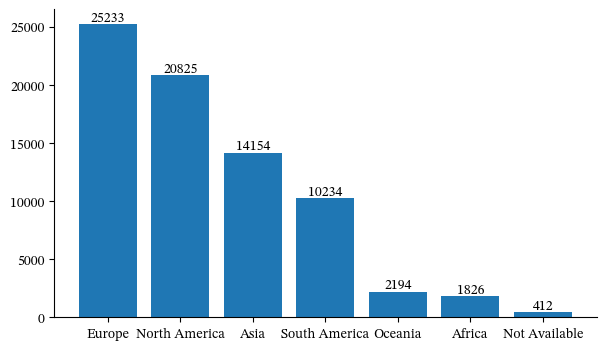

In [7]:
#plot continents
plt.rcParams["font.family"] = "STIX Two Math"
sorted_continents = dict(sorted(list_continents.items(), key=lambda x: x[1], reverse=True))
new_continent_keys = {'Europe': sorted_continents['EU'], 'North America': sorted_continents['NA'], 'Asia': sorted_continents['AS'], 'South America': sorted_continents['SA'], 'Africa': sorted_continents['AF'], 'Oceania': sorted_continents['OC'], 'Not Available': sorted_continents['']}
new_continent_keys = dict(sorted(new_continent_keys.items(), key=lambda x: x[1], reverse=True))
fig, ax = plt.subplots(figsize=(7,4))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.title('Distribution of nodes per continent')
plt.bar(range(len(new_continent_keys.keys())), new_continent_keys.values(), tick_label=list(new_continent_keys.keys()))
ax.bar_label(ax.containers[0], label_type='edge')

{'p2c': 123402, 'p2p': 101705, 'c2p': 1232, 'NA': 190}


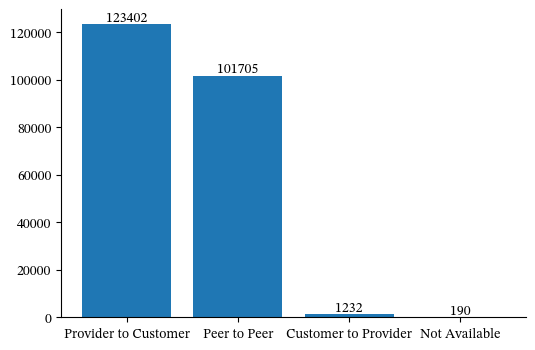

In [8]:
#plot relationships
plt.rcParams["font.family"] = "STIX Two Math"
sorted_rels = dict(sorted(list_relationships.items(), key=lambda x: x[1], reverse=True))
print(sorted_rels)
new_rels = {'Provider to Customer': sorted_rels['p2c'], 'Customer to Provider': sorted_rels['c2p'], 'Peer to Peer': sorted_rels['p2p'], 'Not Available': sorted_rels['NA']}
new_rels = dict(sorted(new_rels.items(), key=lambda x: x[1], reverse=True))
fig, ax = plt.subplots(figsize=(6,4))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.title('Distribution of links per relationship type')
plt.bar(range(len(new_rels.keys())), new_rels.values(), tick_label=list(new_rels.keys()))
ax.bar_label(ax.containers[0], label_type='edge')

{'RIPE': 28586, 'ARIN': 19409, 'APNIC': 13007, 'LACNIC': 11118, 'AFRINIC': 1756, 'JPNIC': 590, 'NOT_AVAILABLE': 412}


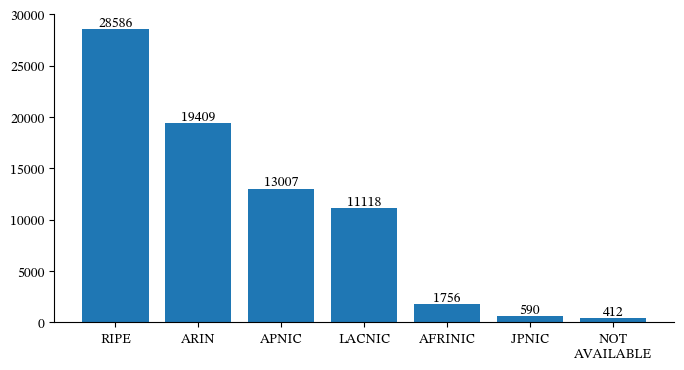

In [9]:
#plot rirs
plt.rcParams["font.family"] = "STIX Two Math"
sorted_rirs= dict(sorted(list_rirs.items(), key=lambda x: x[1], reverse=True))
print(sorted_rirs)
#new_rels = {'Provider to Customer': sorted_rels['p2c'], 'Customer to Provider': sorted_rels['c2p'], 'Peer to Peer': sorted_rels['p2p'], 'Not Available': sorted_rels['NA']}#
#new_rels = dict(sorted(new_rels.items(), key=lambda x: x[1], reverse=True))
fig, ax = plt.subplots(figsize=(8,4))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.title('Distribution of nodes per RIR')
labels = sorted_rirs.keys()
labels = [label.replace('_', '\n') for label in labels]
plt.bar(range(len(sorted_rirs.keys())), sorted_rirs.values(), tick_label=list(labels))
ax.bar_label(ax.containers[0], label_type='edge')

{'Not Disclosed': 58143, 'Cable/DSL/ISP': 9175, 'NSP': 3117, 'Content': 1752, 'Enterprise': 1179, 'Educational/Research': 684, 'Non-Profit': 394, 'Network Services': 363, 'Government': 66, 'Route Collector': 5}


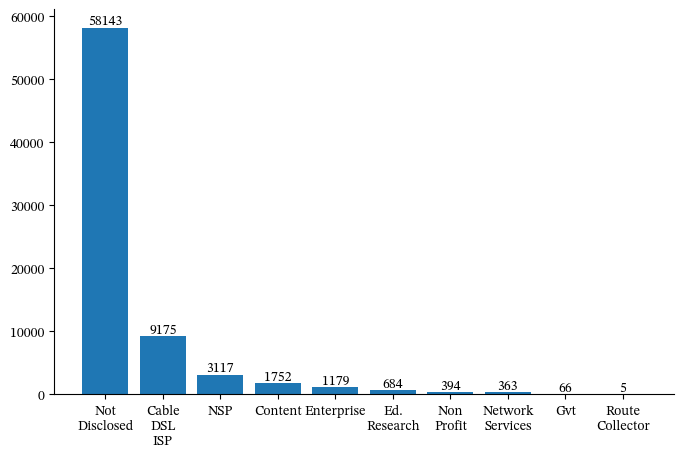

In [10]:
#plot rirs
plt.rcParams["font.family"] = "STIX Two Math"
sorted_business = dict(sorted(list_business.items(), key=lambda x: x[1], reverse=True))
print(sorted_business)
#new_rels = {'Provider to Customer': sorted_rels['p2c'], 'Customer to Provider': sorted_rels['c2p'], 'Peer to Peer': sorted_rels['p2p'], 'Not Available': sorted_rels['NA']}#
#new_rels = dict(sorted(new_rels.items(), key=lambda x: x[1], reverse=True))
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.title('Distribution of nodes per business type')
labels = sorted_business.keys()
labels = [label.replace(' ', '\n') for label in labels]
labels = [label.replace('/', '\n') for label in labels]
labels = [label.replace('-', '\n') for label in labels]
labels = [label.replace('Educational', 'Ed.') for label in labels]
labels = [label.replace('Government', 'Gvt') for label in labels]

plt.bar(range(len(sorted_business.keys())), sorted_business.values(), tick_label=list(labels))
ax.bar_label(ax.containers[0], label_type='edge')

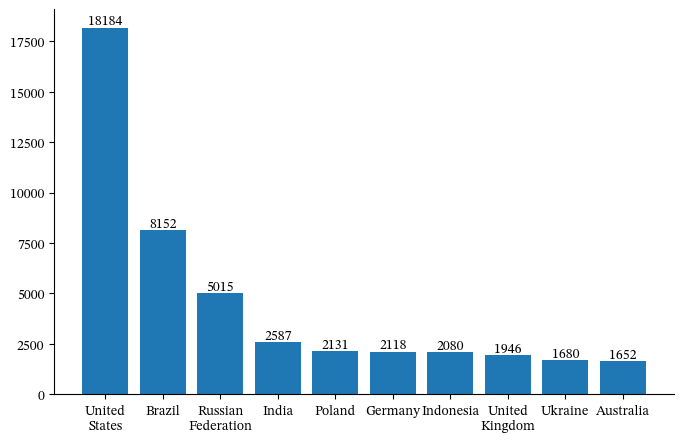

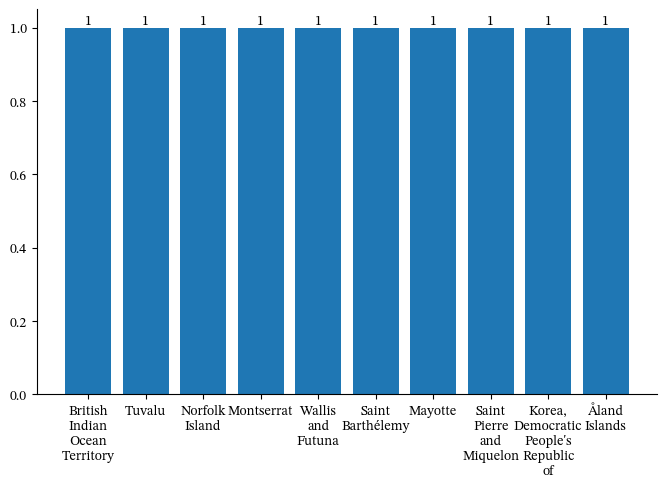

In [12]:
#plot country
plt.rcParams["font.family"] = "STIX Two Math"
sorted_countries_top = dict(sorted(list_countries.items(), key=lambda x: x[1], reverse=True)[:10])
sorted_countries_bot = dict(sorted(list_countries.items(), key=lambda x: x[1], reverse=True)[-10:])

#new_rels = {'Provider to Customer': sorted_rels['p2c'], 'Customer to Provider': sorted_rels['c2p'], 'Peer to Peer': sorted_rels['p2p'], 'Not Available': sorted_rels['NA']}#
#new_rels = dict(sorted(new_rels.items(), key=lambda x: x[1], reverse=True))
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.title('Distribution of nodes per country: Top 10')
labels_top = sorted_countries_top.keys()
labels_top = [label.replace(' ', '\n') for label in labels_top]
plt.bar(range(len(sorted_countries_top.keys())), sorted_countries_top.values(), tick_label=list(labels_top))
ax.bar_label(ax.containers[0], label_type='edge')

fig, ax = plt.subplots(figsize=(8,5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
labels_bot = sorted_countries_bot.keys()
labels_bot = [label.replace(' ', '\n') for label in labels_bot]
#plt.title('Distribution of nodes per country: Bottom 10')
plt.bar(range(len(sorted_countries_bot.keys())), sorted_countries_bot.values(), tick_label=list(labels_bot))
ax.bar_label(ax.containers[0], label_type='edge')

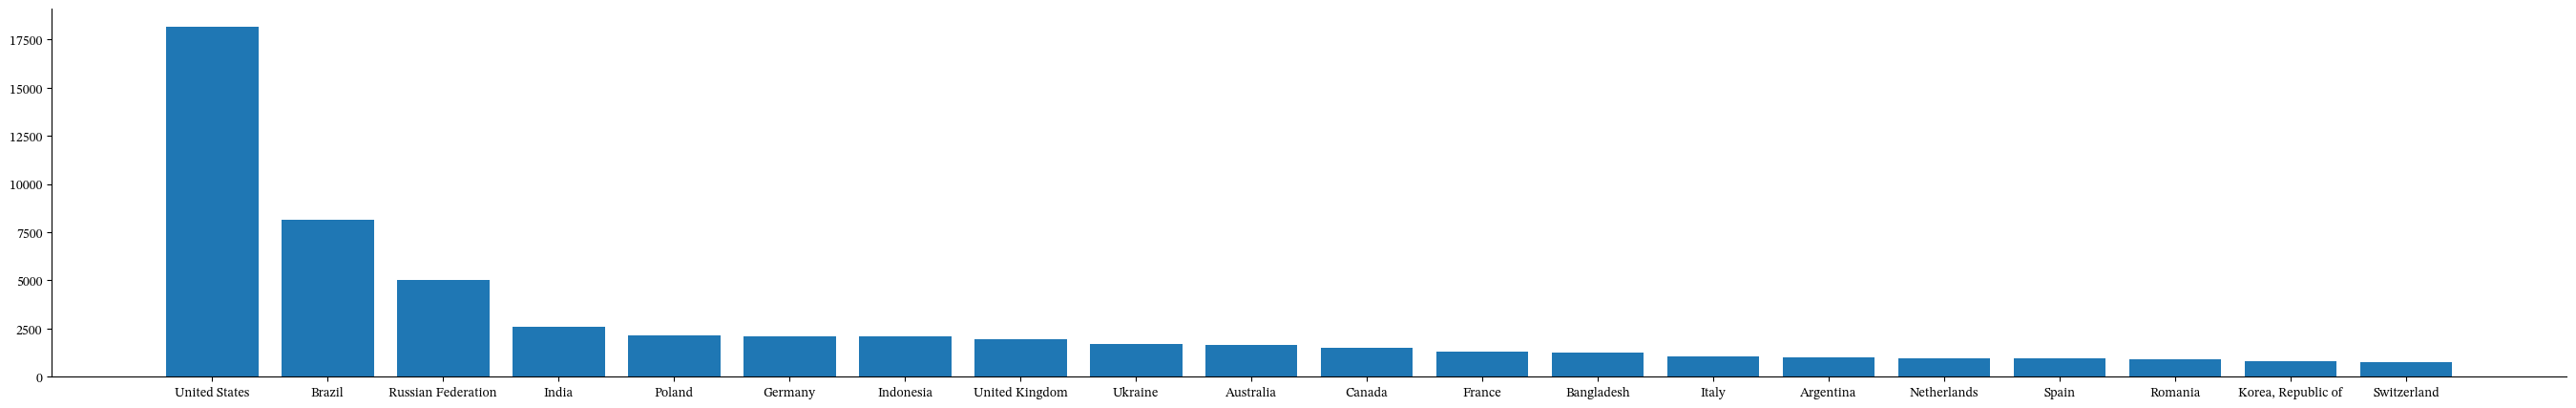

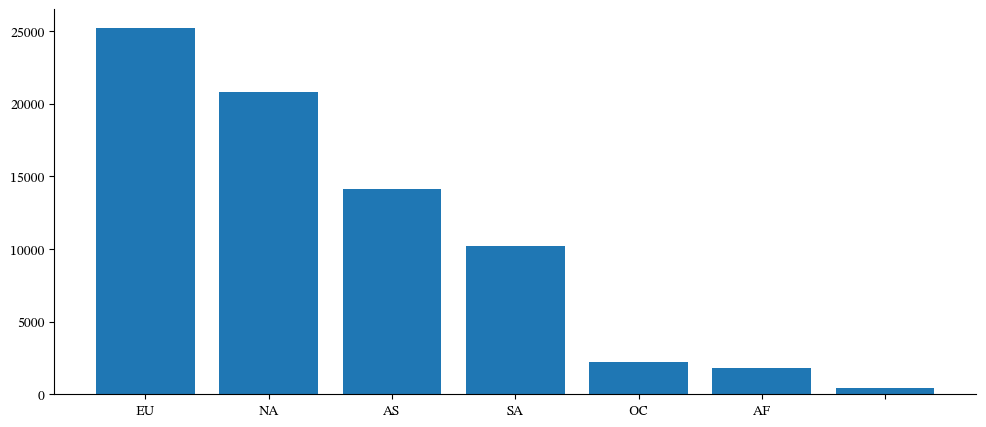

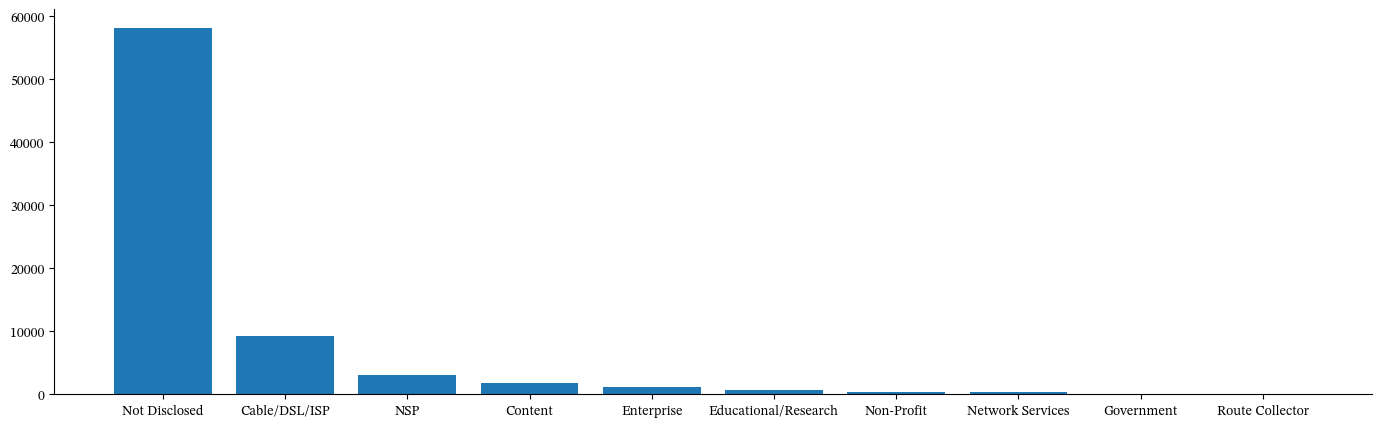

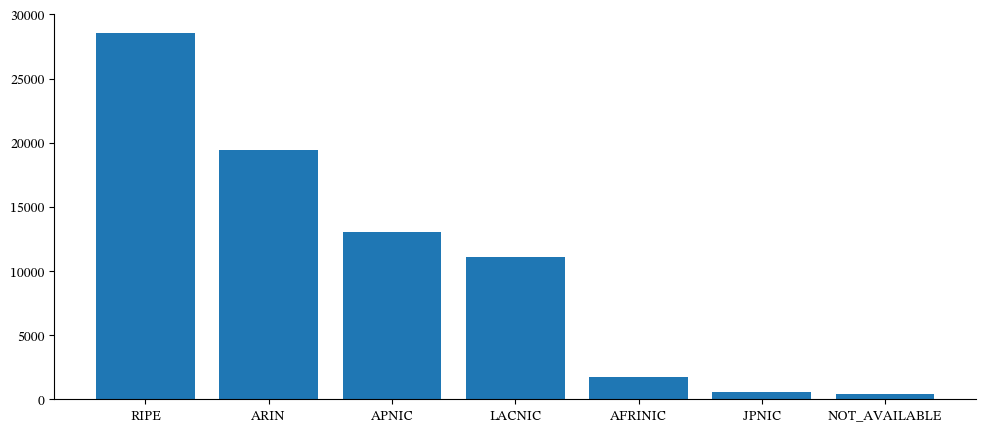

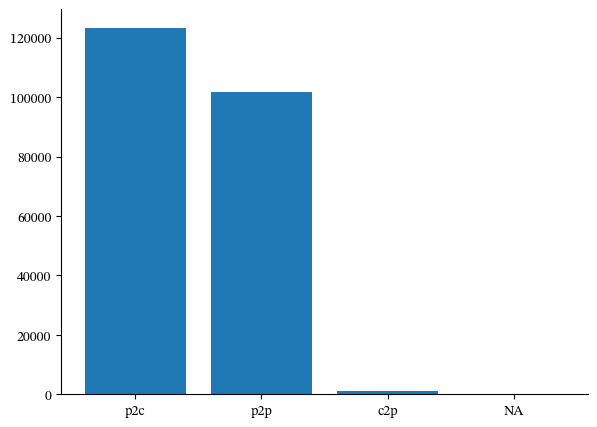

In [21]:

plot_count = 1
for elem in list_dicts:
    elem = dict(sorted(elem.items(), key=lambda x:x[1], reverse=True)[:20])
    fig, ax = plt.subplots(figsize=(1.7*len(elem.keys()),5))
    plt.bar(range(len(elem.keys())), elem.values(), tick_label=list(elem.keys()))
    plt.savefig('plot_'+str(plot_count)+'pdf')
    plot_count+=1